In [1]:
import numpy as np 
import cv2
import pickle
import matplotlib.pyplot as plt

writer_id = 0
drawing_id = 1

canvas_shape = (120, 748)

dataset_path = "../../data/handwriting/BRUSH/raw"

with open(f"{dataset_path}/{writer_id}/{drawing_id}", 'rb') as f:
    [sentence, signal, label] = pickle.load(f)

    #Sentence represents the word written
    print(f"Sentence is: {sentence}")

    #Drawing represents the online signal x,y,eos sampled at 10ms
    print(f"Online signal of len {len(signal)}")

    canvas = np.zeros(canvas_shape)
    draw_current_stroke = False
    for x, y, eos in signal:
        x,y = int(x), int(y)
        if draw_current_stroke:
            canvas = cv2.line(canvas, (last_x, last_y), (x, y), 255, 1) 
        last_x, last_y, draw_current_stroke = x, y, not eos

    plt.imshow(canvas,cmap='gray', vmin=0, vmax=255)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../data/handwriting/BRUSH/raw/0/1'

In [11]:
def load_sample(writer_id: int, drawing_id: int):

    with open(f"{dataset_path}/{writer_id}/{drawing_id}", 'rb') as f:
        [sentence, signal, label] = pickle.load(f)
    
    return sentence, signal, label

In [12]:
canvas_shape = (150, 750)
DRAW_COLOR = 255

def display_sentence(signal: list[int, int, bool], points_mode: bool):
    canvas = np.zeros(canvas_shape)
    draw_current_stroke = False

    for x, y, eos in signal:
        x,y = int(x), int(y)
        if draw_current_stroke:
            if points_mode:
                canvas[y, x] = DRAW_COLOR
            else:
                canvas = cv2.line(canvas, (last_x, last_y), (x, y), DRAW_COLOR, 1) 
        last_x, last_y, draw_current_stroke = x, y, not eos

    plt.imshow(canvas,cmap='gray', vmin=0, vmax=255)

    plt.show()

Sentence: Islington, Hamlin
346.18189031427556
130.69035812904096


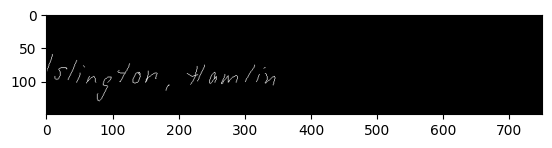

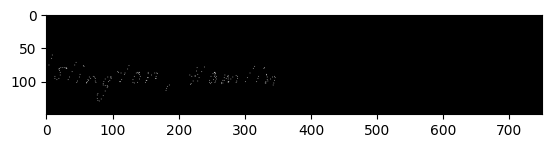

In [13]:
writer_id = 1
drawing_id = 1

sentence, signal, _ = load_sample(writer_id, drawing_id)

print(f"Sentence: {sentence}")

print(max(signal[:, 0]))
print(max(signal[:, 1]))

display_sentence(signal, points_mode=False)
display_sentence(signal, points_mode=True)